### **Problem Tanımı**

Türkiye'de, ulusal Ar-Ge fonları, akademik teşvikler ve araştırmacılar ülkenin bilimsel üretimini yönlendirmektedir. Ancak, bu tıbbi yayınların odaklandığı alanlar ile toplumun gerçek hastalık yükü (erken ölüm ve sakatlığa neden olan en büyük sağlık sorunları) arasında bir uyumsuzluk olma riski bulunmaktadır.

Kaynakların en etkili şekilde kullanılması için, bilimsel araştırmaların toplumun en acil sağlık ihtiyaçlarına cevap verip vermediğini ölçmek kritik bir önem taşımaktadır.

### **Amaç**

Bu projenin temel amacı, 2020-2025 yılları arasında Türkiye'deki hastalık yükü dağılımı (DALY verilerine göre) ile aynı dönemde Türkiye adresli üretilen tıbbi yayınların (PubMed) konu dağılımı arasındaki ilişkiyi sayısal olarak analiz etmektir.

**Nihai Hedefler:**

Türkiye'nin en büyük 10 sağlık sorunu ile bu sorunlara yönelik yapılan yayın sayılarını karşılaştıran net bir tablo ortaya koymak.

Bilimsel araştırma odağında belirgin boşlukları (yüksek hastalık yükü, düşük yayın) veya yığılmaları (düşük hastalık yükü, yüksek yayın) tespit etmek.

Bu bulgular ışığında, Türkiye'nin sağlık Ar-Ge politikalarına ve fonlama önceliklerine yönelik veriye dayalı politika önerilerinde bulunmak.

## **Proje Akışı**

Proje, 5 ana adımdan oluşmuştur:

**Adım 1: Hedef Veri Toplama (Hastalık Yükü)**
* **Görev:** Türkiye'nin en büyük 10 hastalık yükünü (DALY sıralaması bazında) tespit etmek.
* **Kaynak:** IHME (Global Burden of Disease - GBD) veritabanı.
* **Çıktı:** 10 maddelik "En Acil Sağlık Sorunları" (DALY Sıralaması) listesi.

**Adım 2: Büyük Veri Toplama (Bilimsel Yayınlar)**
* **Görev:** 2020-2025 (17 Kasım) arasında "Türkiye/Turkey" adresli ~252.000 tıbbi yayının meta verilerini (Özet, MeSH) çekmek.
* **Yöntem:** PubMed API limitlerini (10k sorgu sınırı) aşmak için "Böl ve Fethet" (Aylık sorgu) stratejisi uygulanmıştır.
* **Çıktı:** Ham yayın veritabanı (CSV).

**Adım 3: Veri İşleme ve NLP Model Geliştirme**
* **Görev:** Ham yayın verilerini 11 kategoriye (10 Hedef + 1 "Diğer") ayıracak bir sınıflandırma modeli geliştirmek.
* **Metodoloji (Pivot):** Başlangıçtaki fizibilite testi, yayınların büyük kısmında (%60+) MeSH etiketinin eksik olduğunu göstermiştir. Bu nedenle, kural tabanlı (MeSH) eşleştirme yerine bir NLP modeli (Plan B) geliştirilmiştir.
* **Yöntem:**
    1.  **Etiketleme:** MeSH etiketi *olan* (~184k) yayınlar, 10 hedef kategorimiz veya "Diğer" olarak etiketlendi.
    2.  **Eğitim Seti:** 10 hedef kategoriden (~ 11.7k makale) ve "Diğer" kategorisinden alınan rastgele bir örneklemden (~20k makale) oluşan 11 kategorili bir "Altın Standart" set oluşturuldu.
    3.  **Model Eğitimi:** Bu set kullanılarak (TF-IDF + `class_weight='balanced'` ile Logistic Regression), "Özet" (Abstract) metinlerini okuyup "Diğer" demeyi de bilen bir model (%89 doğrulukla) eğitildi.
    4.  **Tahmin:** Eğitilen model, etiketi olmayan ("MeSH_Yok") ~55.000 makaleyi sınıflandırmak için kullanıldı.
* **Çıktı:** 10 hedef kategori için nihai yayın sayıları listesi.

**Adım 4: Karşılaştırmalı Analiz**
* **Görev:** Hastalık yükü öncelikleri ile yayın odağı öncelikleri arasındaki uyumu ölçmek.
* **Metodoloji (Pivot):** GBD verisinin (YLL ve YLD bileşenleri) karmaşıklığı nedeniyle doğrudan yüzdesel (%) karşılaştırma yerine, **"Sıralama Korelasyonu" (Rank Correlation)** analizi tercih edilmiştir.
* **Yöntem:** **Liste A (DALY Sıralaması)** ile **Liste B (Yayın Sayısı Sıralaması)** yan yana getirilerek "Uyumsuzluk Skoru" (Rank Farkı) hesaplandı.
* **Çıktı:** "Uyumsuzluk Haritası" (Hangi hastalıklar ihmal edilmiş, hangilerine fazla odaklanılmış).

**Adım 5: Görselleştirme ve Sonuç Raporlaması**
* **Görev:** Bulguları net bir şekilde sunmak ve politika önerilerini oluşturmak.
* **Yöntem:** Dağılım grafiği (scatter plot) ve karşılaştırmalı çubuk grafikler (bar charts) kullanarak "Uyumsuzluk Haritası"nı görselleştirmek.
* **Çıktı:** Nihai "Sonuç Raporu" ve politika önerisi.


### **Adım 1: Hedef Verinin Belirlenmesi - Türkiye'nin En Büyük 10 Sağlık Sorunu**

**Amaç:** Bu adımda, projemizin temel "hedef" verisini, yani bilimsel yayınların odağıyla karşılaştıracağımız "toplumsal sağlık yükünü" tanımlıyoruz.

**Metodoloji:** Neden Sadece Ölümlere Bakmıyoruz? Bir ülkenin sağlık yükünü ölçerken sadece ölüm oranlarına bakmak, resmin yarısını kaçırmamıza neden olur. Toplumun yaşam kalitesini ciddi şekilde düşüren, ancak doğrudan ölüme yol açmayan kronik hastalıklar göz ardı edilir. Bu nedenle, projemiz için en kapsamlı ve bilimsel metrik olan DALY (Disability-Adjusted Life Years - Sakatlığa Ayarlanmış Yaşam Yılları) metriğini kullanmayı seçtik.

    DALY = YLL + YLD

* YLL (Years of Life Lost): Erken ölümler nedeniyle kaybedilen yaşam yılları.

* YLD (Years Lived with Disability): Hastalık veya sakatlık nedeniyle düşük yaşam kalitesiyle geçirilen yıllar.

**Veri Kaynağı:** Bu hedef listesi, küresel sağlık verileri konusunda en yetkili kuruluş olan IHME (Institute for Health Metrics and Evaluation) tarafından yürütülen Global Burden of Disease (GBD) çalışmasının Türkiye verilerine (2019-2023 dönemi analizlerine) dayanarak oluşturulmuştur.

**Hedef Listemiz:** Türkiye'nin En Acil 10 Sağlık Sorunu

Bu liste, hem yüksek ölüm (YLL) hem de yüksek sakatlık (YLD) yüküne sahip kategorileri içermektedir. NLP modelimiz bu 10 kategoriyi ve bir "Diğer" kategorisini tanımak üzere eğitilecektir.

* **Grup 1: Yüksek Ölüm Yükü (YLL) Ağırlıklı Sorunlar**
    - İskemik Kalp Hastalığı (Ischemic Heart Disease)
    - İnme (Felç) (Stroke)
    - Akciğer, Bronş ve Trakea Kanseri (Lung, Bronchus, and Trachea Cancer)
    - KOAH (Kronik Obstrüktif Akciğer Hastalığı) (COPD)
    - Kronik Böbrek Hastalığı (Chronic Kidney Disease)

* **Grup 2: Yüksek Sakatlık Yükü (YLD) Ağırlıklı Sorunlar**
    - Diyabet (Şeker Hastalığı) (Diabetes Mellitus)
    - Bel ve Boyun Ağrıları (Low Back and Neck Pain)
    - Depresif Bozukluklar (Depressive Disorders)
    - Baş Ağrısı Bozuklukları (Migren vb.) (Headache Disorders)
    - Neonatal (Yenidoğan) Bozuklukları (Neonatal Disorders)

**Sonuç:** Bu 10 kategori, projemizin "hedef tahtasıdır". Bilimsel yayınların ne kadarının bu acil sorunlara odaklandığını ölçmek için analizimizin temelini oluşturacaktır.

In [14]:
# --- Veri Çekme ve İşleme Kütüphaneleri ---
import requests                     # PubMed API'sine HTTP istekleri göndermek için
import xml.etree.ElementTree as ET  # PubMed'den gelen XML verisini işlemek için
import pandas as pd                 # Veri analizi ve DataFrame işlemleri için
import numpy as np                  # Sayısal işlemler ve NaN değerleri için
import ast                          # CSV'den okunan string listeleri Python listesine çevirmek için
import re                           # Metin temizleme için (Regular Expressions)
import time                         # API istekleri arasında bekleme yapmak için
import math                         # Toplam batch sayısını hesaplamak için
from datetime import datetime       # Tarih aralıklarını belirlemek için
from dateutil.relativedelta import relativedelta # Aylık döngü için

# --- Google Colab Entegrasyonu ---
from google.colab import drive      # CSV dosyasını Google Drive'a kaydetmek/okumak için
import shutil                       # Dosya kopyalama işlemleri için

# --- Makine Öğrenimi (NLP) Kütüphaneleri ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Görselleştirme Kütüphaneleri ---
import matplotlib.pyplot as plt     # Temel grafikler için
import seaborn as sns               # Daha gelişmiş ve estetik grafikler için

# Grafiklerin daha güzel görünmesi için bir stil ayarı
plt.style.use('seaborn-v0_8-whitegrid')

print("Tüm kütüphaneler başarıyla yüklendi.")

Tüm kütüphaneler başarıyla yüklendi.


In [1]:
# Veri Erişilebilirlik Kontrolü (Fizibilite Testi)

# Amaç: Bu testin amacı, projemizin bel kemiği olan "bilimsel yayın" verisine (Adım 2)
# gerçekten erişip erişemediğimizi ve eriştiğimiz verinin projemizin "NLP sınıflandırması" (Adım 3)
# için yeterli kalitede olup olmadığını projenin en başında teyit etmektir.


# Bağlantı: PubMed'in E-utilities API'sine (dış dünyaya açtığı veri kapısı) bağlanabiliyor muyuz?

# Filtreleme: API'yi kullanarak "Türkiye" OR "Turkey" adresli yayınları doğru bir şekilde filtreleyebiliyor muyuz?

# Veri Kalitesi (En Önemlisi): Çektiğimiz yayın verisinin içinde, projemiz için önemli
#"Abstract" (Özet) ve "MeSH Terms" (Tıbbi Konu Başlıkları) alanları dolu ve tutarlı bir şekilde geliyor mu?

print("PubMed API Fizibilite Testi Başlatılıyor...")

# --- Ayarlar ---
# E-posta adresinizi girmemiz, PubMed'in yoğun kullanımda size ulaşabilmesi için önerilir.
# API anahtarı (API key) almanız zorunlu değildir ancak çok fazla veri çekecekseniz önerilir.
EMAIL_ADDRESS = "aybukeseven2@gmail.com"  # Burayı kendi e-postanızla değiştirebilirsiniz

# --- 1. Adım: ARAMA  ---
# Belirtilen kriterlere uyan makalelerin ID'lerini (PMID) arayalım.
# Kriter: 2023'te yayınlanmış VE kurumu (Affiliation) "Turkey" VEYA "Türkiye" olan
# retmax=20 -> Sadece son 20 makaleyi test için getir (hızlı olması için)

print("\n--- Adım 1: Makale ID'leri Aranıyor (esearch) ---")
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"
db = "pubmed"
query = '("Turkey"[Affiliation] OR "Türkiye"[Affiliation]) AND ("2023/01/01"[Date - Publication] : "2023/12/31"[Date - Publication])'
search_url = f"{base_url}esearch.fcgi?db={db}&term={query}&retmax=20&sort=date&usehistory=y&email={EMAIL_ADDRESS}"

try:
    search_response = requests.get(search_url)
    search_response.raise_for_status()  # Hata varsa durdur

    # XML yanıtını işle
    search_root = ET.fromstring(search_response.content)
    id_list = [id_elem.text for id_elem in search_root.findall(".//IdList/Id")]

    if not id_list:
        print("HATA: Kriterlere uygun makale bulunamadı veya API sorgusunda sorun var.")
    else:
        print(f"Başarılı! Test için {len(id_list)} adet makale ID'si bulundu.")
        print(id_list)

        # --- 2. Adım: DETAY ÇEKME (efetch) ---
        # Bulduğumuz ID listesini kullanarak makalelerin detaylarını çekelim.

        print("\n--- Adım 2: Makale Detayları Çekiliyor (efetch) ---")
        id_string = ",".join(id_list)
        fetch_url = f"{base_url}efetch.fcgi?db={db}&id={id_string}&retmode=xml&email={EMAIL_ADDRESS}"

        fetch_response = requests.get(fetch_url)
        fetch_response.raise_for_status()

        # --- 3. Adım: VERİ AYIKLAMA (Parsing XML) ---
        # Gelen XML verisini işleyip bizim için kritik alanları (Özet, MeSH) arayalım.

        print("\n--- Adım 3: Kritik Veriler Ayıklanıyor ---")
        fetch_root = ET.fromstring(fetch_response.content)

        # Gelen XML'deki her bir <PubmedArticle> etiketini döngüye al
        for article in fetch_root.findall(".//PubmedArticle"):
            pmid_elem = article.find(".//PMID")
            pmid = pmid_elem.text if pmid_elem is not None else "PMID BULUNAMADI"

            title_elem = article.find(".//ArticleTitle")
            title = title_elem.text if title_elem is not None else "Başlık Yok"

            # Özet (Abstract) metnini çekmeyi dene
            abstract_elem = article.find(".//Abstract/AbstractText")
            abstract = abstract_elem.text if abstract_elem is not None else "ÖZET YOK"

            # MeSH (Tıbbi Konu Başlıkları) listesini çekmeyi dene
            mesh_terms = []
            mesh_list_elem = article.find(".//MeshHeadingList")
            if mesh_list_elem is not None:
                for mesh_elem in mesh_list_elem.findall(".//MeshHeading/DescriptorName"):
                    mesh_terms.append(mesh_elem.text)

            if not mesh_terms:
                mesh_terms = ["MeSH TERİMİ YOK"] # Eğer liste boşsa belirt

            # Sonuçları yazdır
            print("-" * 50)
            print(f"PMID: {pmid}")
            print(f"Başlık: {title[:70]}...") # Başlığın ilk 70 karakterini göster

            # *** FİZİBİLİTE KONTROL NOKTASI ***
            print(f"Özet Durumu: {'DOLU' if abstract != 'ÖZET YOK' else '!!! BOŞ !!!'}")
            print(f"MeSH Durumu: {'DOLU' if mesh_terms != ['MeSH TERİMİ YOK'] else '!!! BOŞ !!!'}")
            print(f"Bulunan MeSH Terimleri: {mesh_terms}")
            print("-" * 50)

            # API'yi yormamak için kısa bir bekleme
            time.sleep(0.1)

except requests.exceptions.RequestException as e:
    print(f"\nAPI BAĞLANTI HATASI: {e}")
except ET.ParseError as e:
    print(f"\nXML İŞLEME HATASI: Gelen veri bozuk olabilir. {e}")
except Exception as e:
    print(f"\nBEKLENMEDİK BİR HATA OLUŞTU: {e}")

PubMed API Fizibilite Testi Başlatılıyor...

--- Adım 1: Makale ID'leri Aranıyor (esearch) ---
Başarılı! Test için 20 adet makale ID'si bulundu.
['40959718', '40838963', '40837984', '40746776', '40314007', '39960389', '39959598', '39959597', '39959596', '39959590', '39758576', '39678052', '39640952', '39630182', '39619458', '39593466', '39513162', '39492498', '39492448', '39492398']

--- Adım 2: Makale Detayları Çekiliyor (efetch) ---

--- Adım 3: Kritik Veriler Ayıklanıyor ---
--------------------------------------------------
PMID: 40959718
Başlık: Comparison of 1- and 3-Week Immobilization Following Arthroscopic Shou...
Özet Durumu: DOLU
MeSH Durumu: !!! BOŞ !!!
Bulunan MeSH Terimleri: ['MeSH TERİMİ YOK']
--------------------------------------------------
--------------------------------------------------
PMID: 40838963
Başlık: The Effect of Breast Cancer Risk Reduction Program Applied to Women Wi...
Özet Durumu: DOLU
MeSH Durumu: DOLU
Bulunan MeSH Terimleri: ['Humans', 'Female', 'B

## Proje Notu: Metodoloji Değişikliği

**Başlangıç Hipotezi:** Projemiz için ilk stratejimiz, Türkiye adresli bilimsel yayınları sınıflandırmak için makalelere atanmış olan MeSH (Medical Subject Headings - Tıbbi Konu Başlıkları) etiketlerini kullanmaktı. Planımız, bu standart etiketleri ("Diabetes Mellitus" gibi) alıp, doğrudan "Hastalık Yükü" listemizdeki ("Diyabet" gibi) kategorilerle eşleştirmekti.

**Fizibilite Testi Bulguları:** Bu yaklaşımın uygulanabilirliğini test etmek için PubMed API'si üzerinde bir pilot test gerçekleştirdik. Test sonuçları kritik bir gerçeği ortaya çıkardı:

2023 tarihli, "Türkiye" adresli makalelerin sorgulandığı pilot testimizde, makalelerin yaklaşık %60'ında (20'de 12) MeSH etiketlerinin EKSİK olduğunu tespit ettik.

Buna karşın, "Abstract" (Özet) metninin 20'de 20 (%100) oranında mevcut olduğunu gördük.

**Stratejik Yön Değişikliği:** Bu bulgu, sadece MeSH etiketlerine dayalı bir analizin, toplam yayınların yarısından fazlasını ıskalayacağı ve bu nedenle projenin sonuçlarını tamamen hatalı ve geçersiz kılacağı anlamına gelmektedir.

Bu nedenle, projeyi çok daha sağlam bir temele oturtmak için metodolojimizi değiştirdik:

Artık makalelerin "Özet" (Abstract) metinlerini birincil veri kaynağı olarak kullanacağız.

MeSH etiketlerine güvenmek yerine, bu özet metinlerini okuyup anlayabilen bir Doğal Dil İşleme (NLP) Metin Sınıflandırma Modeli geliştireceğiz.

Bu model, MeSH etiketi bulunan (%40'lık) azınlık veri seti üzerinde eğitilecek ve ardından MeSH etiketi bulunmayan (%60'lık) çoğunluk veri setini sınıflandırmak için kullanılacaktır.


### **Adım 3 Hazırlık: NLP Modeli için Anahtar Kelime Stratejisi**

**Amaç:** Fizibilite testimizde, Türkiye adresli yayınların büyük bir kısmında (%60+) MeSH etiketlerinin eksik olduğunu keşfettik. Bu nedenle, makalelerin **"Özet" (Abstract)** metinlerini kullanarak bir NLP Metin Sınıflandırma Modeli eğitmeye karar verdik (Plan B).

Bu bölüm, o NLP modelini eğitmek için kullanacağımız **"Altın Standart Eğitim Seti" (Gold Standard Training Set)** verisini nasıl oluşturacağımızı tanımlar.

**Metodoloji:**

1.  **Adım 2 (Veri Çekme):** 2020-2025 (12 Kasım) arası Türkiye adresli yayınların Özet (Abstract) ve (varsa) MeSH verilerini çekeceğiz.
2.  **Adım 3 (Model Eğitimi):**
      * Çektiğimiz bu büyük veride, MeSH terimi **olan** makaleleri filtreleyeceğiz (o şanslı \~%40'lık kesim).
      * Aşağıdaki **Resmi MeSH Terimleri** listesini kullanarak bu makaleleri otomatik olarak etiketleyeceğiz. (Örn: Makalenin MeSH listesinde "Stroke" varsa, onu "İnme (Felç)" kategorisine atayacağız).
      * Böylece `[Makale Özeti, Etiket]` şeklinde binlerce satırlık bir eğitim setimiz olacak.
      * NLP modelimiz, bu özetleri okuyarak "Stroke" kelimesi geçmese bile bir metnin inme ile ilgili olduğunu (örn. "cerebral ischemia", "hemorrhage" gibi "Yaygın Terimler" sütunundaki kelimelerden) *öğrenecek*.
      * Eğitilen bu modeli, MeSH terimi **olmayan** o devasa %60'lık veriyi sınıflandırmak için kullanacağız\!

-----

### NLP Eğitim Seti için Anahtar Kelime ve MeSH Listesi

Aşağıdaki tablo, 10 hedef kategorimizin her biri için kullanılacak resmi MeSH terimlerini (etiketleme için) ve modelimizin bu özetlerde bulup öğrenmesini beklediğimiz yaygın terimleri göstermektedir.

| Kategori (Türkçe) | Resmi MeSH Terimleri (Etiketleme için) | Yaygın Terimler (Modelin Öğreneceği Örnekler) |
| :--- | :--- | :--- |
| **1. İskemik Kalp Hastalığı** | `Ischemic Heart Disease` <br> `Myocardial Infarction` <br> `Coronary Artery Disease` <br> `Angina Pectoris` | `heart attack`, `coronary`, `cardiac ischemia`, `ACS` (Acute Coronary Syndrome) |
| **2. İnme (Felç)** | `Stroke` <br> `Cerebrovascular Disorders` <br> `Cerebral Infarction` <br> `Intracranial Hemorrhages` | `CVA` (Cerebrovascular Accident), `brain ischemia`, `cerebral hemorrhage` |
| **3. Akciğer Kanseri** | `Lung Neoplasms` <br> `Bronchial Neoplasms` <br> `Tracheal Neoplasms` | `lung cancer`, `NSCLC` (Non-Small Cell), `SCLC` (Small Cell), `bronchogenic carcinoma` |
| **4. KOAH** | `Pulmonary Disease, Chronic Obstructive` <br> `COPD` | `emphysema`, `chronic bronchitis`, `spirometry`, `inhaler` |
| **5. Kronik Böbrek Hastalığı** | `Renal Insufficiency, Chronic` <br> `Chronic Kidney Disease` <br> `Kidney Failure, Chronic` | `CKD`, `ESRD` (End-Stage Renal Disease), `dialysis`, `hemodialysis`, `renal failure` |
| **6. Diyabet** | `Diabetes Mellitus` <br> `Diabetes Mellitus, Type 1` <br> `Diabetes Mellitus, Type 2` | `T1DM`, `T2DM`, `insulin resistance`, `hyperglycemia`, `diabetic`, `glycemic control` |
| **7. Bel ve Boyun Ağrıları** | `Low Back Pain` <br> `Neck Pain` <br> `Back Pain` | `lumbago`, `cervicalgia`, `sciatica`, `musculoskeletal pain`, `spine pain` |
| **8. Depresif Bozukluklar** | `Depressive Disorders` <br> `Major Depressive Disorder` <br> `Depression` | `MDD`, `antidepressant`, `mental health`, `suicidal ideation`, `mood disorder` |
| **9. Baş Ağrısı Bozuklukları** | `Headache Disorders` <br> `Migraine Disorders` <br> `Tension-Type Headache` | `migraine`, `headache`, `cluster headache`, `aura` |
| **10. Neonatal Bozukluklar** | `Infant, Newborn, Diseases` <br> `Neonatal Diseases` <br> `Premature Birth` <br> `Respiratory Distress Syndrome, Newborn` | `neonatal`, `newborn`, `preterm`, `low birth weight`, `NICU` (Neonatal Intensive Care Unit) |

Tek seferde çekmeye çalışınca hata aldık o nedenle bölerek veriyi çekmeye karar verdik.

In [2]:
print("Adım 2: Büyük Veri Toplama Başlatıldı (v4 - BÖL VE FETHET)")

# --- 1. Ayarlar ve Parametreler ---
EMAIL_ADDRESS = "aybukeseven2@gmail.com" # Lütfen kendi e-postanızı girin
BATCH_SIZE = 200 # Her parti boyutu


MAX_RETRIES = 5
RETRY_DELAY_SECONDS = 20
POLITE_DELAY_SECONDS = 1

# --- Sorgu Ayarları ---
AFFILIATION_QUERY = '("Turkey"[Affiliation] OR "Türkiye"[Affiliation])'
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"
db = "pubmed"
output_filename = "pubmed_data_2020-2025_FULL_v4.csv" # Dosyamızın adı

# Toplanan tüm makalelerin saklanacağı ANA liste
all_articles_data = []

# --- 2. Aylık Döngü ---
# Başlangıç ve bitiş tarihlerini belirle
start_date = datetime(2020, 1, 1)
# 12 Kasım 2025'e kadar olan veriyi çekiyoruz
end_date = datetime(2025, 11, 12)

current_date = start_date
total_processed_articles = 0

print(f"Döngü {start_date.strftime('%Y-%m')} ile {end_date.strftime('%Y-%m')} arasında başlatılıyor...")

while current_date <= end_date:
    # --- O AY İÇİN TARİH ARALIĞINI BELİRLE ---
    month_start_str = current_date.strftime('%Y/%m/%d')
    month_end = (current_date + relativedelta(months=1) - relativedelta(days=1))
    if month_end > end_date:
        month_end = end_date
    month_end_str = month_end.strftime('%Y/%m/%d')

    print("-" * 50)
    print(f"AY İŞLENİYOR: {current_date.strftime('%Y-%m')}")

    DATE_QUERY = f'("{month_start_str}"[Date - Publication] : "{month_end_str}"[Date - Publication])'
    FULL_QUERY = f"({AFFILIATION_QUERY}) AND ({DATE_QUERY})"

    try:
        # --- FAZ 1: AYLIK ARAMA (esearch) ---
        print(f"  -> Faz 1: {current_date.strftime('%Y-%m')} için makaleler aranıyor...")

        esearch_url = f"{base_url}esearch.fcgi?db={db}&term={FULL_QUERY}&usehistory=y&retmode=json&email={EMAIL_ADDRESS}"
        search_response = requests.get(esearch_url)
        search_response.raise_for_status()
        search_data = search_response.json()

        total_count = int(search_data["esearchresult"]["count"])

        if total_count == 0:
            print(f"  -> Bu ay için 0 makale bulundu. Atlanıyor.")
            current_date += relativedelta(months=1)
            time.sleep(POLITE_DELAY_SECONDS)
            continue

        webenv = search_data["esearchresult"]["webenv"]
        query_key = search_data["esearchresult"]["querykey"]

        print(f"  -> Başarılı: Bu ay için {total_count} adet makale bulundu.")

        total_batches = math.ceil(total_count / BATCH_SIZE)

        # --- FAZ 2: AYLIK DETAY ÇEKME (efetch) ---
        print(f"  -> Faz 2: {total_count} makale {total_batches} batch halinde çekilecek...")

        for retstart in range(0, total_count, BATCH_SIZE):
            batch_num = (retstart // BATCH_SIZE) + 1
            print(f"    -> Batch {batch_num} / {total_batches} işleniyor...")

            fetch_url = f"{base_url}efetch.fcgi?db={db}&webenv={webenv}&query_key={query_key}&retstart={retstart}&retmax={BATCH_SIZE}&retmode=xml&email={EMAIL_ADDRESS}"


            success = False
            for attempt in range(MAX_RETRIES):
                try:
                    fetch_response = requests.get(fetch_url, timeout=30.0)
                    fetch_response.raise_for_status()
                    fetch_root = ET.fromstring(fetch_response.content)
                    success = True
                    break
                except requests.exceptions.HTTPError as e:
                    if e.response.status_code == 429: # Too Many Requests
                        print(f"      !!! HATA 429 (Deneme {attempt + 1}): API yavaşlamamızı istedi. {RETRY_DELAY_SECONDS}sn bekleniyor...")
                        time.sleep(RETRY_DELAY_SECONDS)
                    else:
                        print(f"      !!! HTTP HATASI (Deneme {attempt + 1}): {e}. {RETRY_DELAY_SECONDS}sn bekleniyor...")
                        time.sleep(RETRY_DELAY_SECONDS)
                except Exception as e:
                    print(f"      !!! Genel Hata (Deneme {attempt + 1}): {e}. {RETRY_DELAY_SECONDS}sn bekleniyor...")
                    time.sleep(RETRY_DELAY_SECONDS)

            if not success:
                print(f"    !!! KRİTİK HATA: Batch {batch_num} (Ay: {current_date.strftime('%Y-%m')}) tüm denemelere rağmen çekilemedi. ATLANDI.")
                continue

            # --- FAZ 3: VERİ AYIKLAMA (Parsing XML) ---
            for article in fetch_root.findall(".//PubmedArticle"):
                pmid_elem = article.find(".//PMID")
                pmid = pmid_elem.text if pmid_elem is not None else ""
                title_elem = article.find(".//ArticleTitle")
                title = title_elem.text if title_elem is not None else ""
                abstract_text = ""
                abstract_elems = article.findall(".//Abstract/AbstractText")
                if abstract_elems is not None:
                    abstract_text = " ".join([elem.text for elem in abstract_elems if elem.text])
                if not abstract_text: abstract_text = None
                mesh_terms = []
                mesh_list_elem = article.find(".//MeshHeadingList")
                if mesh_list_elem is not None:
                    for mesh_elem in mesh_list_elem.findall(".//MeshHeading/DescriptorName"):
                        mesh_terms.append(mesh_elem.text)
                if not mesh_terms: mesh_terms = None

                all_articles_data.append({
                    "pmid": pmid,
                    "title": title,
                    "abstract": abstract_text,
                    "mesh_terms": mesh_terms
                })

            time.sleep(POLITE_DELAY_SECONDS) # Partiler arası "nazik" bekleme

    except Exception as e:
        print(f"!!! KRİTİK AYLIK HATA: {current_date.strftime('%Y-%m')} ayı işlenirken durdu: {e}")
        print("Bu ay atlanıyor, bir sonraki aydan devam edilecek.")

    # Bir sonraki aya geç
    current_date += relativedelta(months=1)

    # --- ARA KAYIT (Checkpoint) ---
    if all_articles_data:
        print(f"  --- CHECKPOINT: Toplam {len(all_articles_data)} makale ara kaydediliyor -> {output_filename} ---")
        df_checkpoint = pd.DataFrame(all_articles_data)
        # mode='w' (write): Her checkpoint'te dosyanın üzerine yazar
        df_checkpoint.to_csv(output_filename, index=False, encoding='utf-8', mode='w')

# --- FAZ 4: VERİYİ KAYDETME (SON KAYIT) ---
print("\n" + "="*50)
print("--- FAZ 4: Tüm Aylar Tamamlandı - Veri Kaydediliyor (Final) ---")
if not all_articles_data:
    print("HATA: Hiçbir veri çekilemedi.")
else:
    df = pd.DataFrame(all_articles_data)
    df.to_csv(output_filename, index=False, encoding='utf-8', mode='w')

    print(f"BAŞARI!")
    print(f"Toplam {len(df)} makale detayı başarıyla işlendi ve '{output_filename}' dosyasına kaydedildi.")

    print("\nVeri Çerçevesi Bilgisi (df.info()):")
    df.info()

print("\nVeri çekme işlemi tamamlandı.")

Adım 2: Büyük Veri Toplama Başlatıldı (v4 - BÖL VE FETHET)
Döngü 2020-01 ile 2025-11 arasında başlatılıyor...
--------------------------------------------------
AY İŞLENİYOR: 2020-01
  -> Faz 1: 2020-01 için makaleler aranıyor...
  -> Başarılı: Bu ay için 4867 adet makale bulundu.
  -> Faz 2: 4867 makale 25 batch halinde çekilecek...
    -> Batch 1 / 25 işleniyor...
    -> Batch 2 / 25 işleniyor...
    -> Batch 3 / 25 işleniyor...
    -> Batch 4 / 25 işleniyor...
    -> Batch 5 / 25 işleniyor...
    -> Batch 6 / 25 işleniyor...
    -> Batch 7 / 25 işleniyor...
    -> Batch 8 / 25 işleniyor...
    -> Batch 9 / 25 işleniyor...
    -> Batch 10 / 25 işleniyor...
    -> Batch 11 / 25 işleniyor...
    -> Batch 12 / 25 işleniyor...
    -> Batch 13 / 25 işleniyor...
    -> Batch 14 / 25 işleniyor...
    -> Batch 15 / 25 işleniyor...
    -> Batch 16 / 25 işleniyor...
    -> Batch 17 / 25 işleniyor...
    -> Batch 18 / 25 işleniyor...
    -> Batch 19 / 25 işleniyor...
    -> Batch 20 / 25 işleni

In [3]:
print("Google Drive'a bağlanılıyor...")
# Bu komut, Google hesabımız için izin isteyecek.
drive.mount('/content/drive')

# Kaynak dosya (Colab'in geçici hafızasındaki)
kaynak_dosya = "pubmed_data_2020-2025_FULL_v4.csv"

# Hedef dosya (Senin Google Drive'ındaki ana klasör)
hedef_klasor = "/content/drive/MyDrive/"
hedef_dosya_yolu = f"{hedef_klasor}{kaynak_dosya}"

try:
    print(f"'{kaynak_dosya}' dosyası Google Drive'ınıza kopyalanıyor...")
    # shutil.copy komutu, büyük dosyaları kopyalamak için güvenilirdir
    shutil.copy(kaynak_dosya, hedef_dosya_yolu)
    print("BAŞARILI!")
    print(f"Dosya artık Google Drive'ınızda güvende: {hedef_dosya_yolu}")
except FileNotFoundError:
    print(f"HATA: Kopyalanacak kaynak dosya '{kaynak_dosya}' bulunamadı.")
except Exception as e:
    print(f"HATA: Kopyalama sırasında bir sorun oluştu: {e}")

Google Drive'a bağlanılıyor...
Mounted at /content/drive
'pubmed_data_2020-2025_FULL_v4.csv' dosyası Google Drive'ınıza kopyalanıyor...
BAŞARILI!
Dosya artık Google Drive'ınızda güvende: /content/drive/MyDrive/pubmed_data_2020-2025_FULL_v4.csv


In [4]:
# Önce Drive'a bağlan
drive.mount('/content/drive')

# Dosyayı Colab'den değil, doğrudan Drive'dan oku
filename = "/content/drive/MyDrive/pubmed_data_2020-2025_FULL_v4.csv"

def convert_mesh_to_list(mesh_string):
    # ... (dönüştürme fonksiyonu) ...
    if pd.isna(mesh_string): return np.nan
    try: return ast.literal_eval(mesh_string)
    except: return np.nan

print(f"'{filename}' (Google Drive'dan) yükleniyor...")
df_full = pd.read_csv(
    filename,
    converters={'mesh_terms': convert_mesh_to_list}
)
print("Veri (Drive'dan) başarıyla yüklendi!")
df_full.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/pubmed_data_2020-2025_FULL_v4.csv' (Google Drive'dan) yükleniyor...
Veri (Drive'dan) başarıyla yüklendi!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252014 entries, 0 to 252013
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   pmid        252014 non-null  int64 
 1   title       251220 non-null  object
 2   abstract    222846 non-null  object
 3   mesh_terms  184228 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB


In [5]:
# --- 1. Anahtar Kelime Haritasını Tanımlama ---
# 10 hedef kategorimiz ve onlara karşılık gelen MeSH terimleri
kategori_map_sets = {
    "İskemik Kalp Hastalığı": {"Ischemic Heart Disease", "Myocardial Infarction", "Coronary Artery Disease", "Angina Pectoris"},
    "İnme (Felç)": {"Stroke", "Cerebrovascular Disorders", "Cerebral Infarction", "Intracranial Hemorrhages"},
    "Akciğer Kanseri": {"Lung Neoplasms", "Bronchial Neoplasms", "Tracheal Neoplasms"},
    "KOAH": {"Pulmonary Disease, Chronic Obstructive", "COPD"},
    "Kronik Böbrek Hastalığı": {"Renal Insufficiency, Chronic", "Chronic Kidney Disease", "Kidney Failure, Chronic"},
    "Diyabet": {"Diabetes Mellitus", "Diabetes Mellitus, Type 1", "Diabetes Mellitus, Type 2"},
    "Bel ve Boyun Ağrıları": {"Low Back Pain", "Neck Pain", "Back Pain"},
    "Depresif Bozukluklar": {"Depressive Disorders", "Major Depressive Disorder", "Depression"},
    "Baş Ağrısı Bozuklukları": {"Headache Disorders", "Migraine Disorders", "Tension-Type Headache"},
    "Neonatal Bozukluklar": {"Infant, Newborn, Diseases", "Neonatal Diseases", "Premature Birth", "Respiratory Distress Syndrome, Newborn"}
}

# 10 ana kategorinin bir listesini tutalım
ANA_KATEGORILER = list(kategori_map_sets.keys())


# --- 2. Etiketleme Fonksiyonu ---
def etiketle_makale(mesh_list):
    """
    Bir makalenin MeSH listesini alır (eğer varsa) ve 10 kategorimizden biriyle
    veya 'Diğer' kategorisiyle eşleştirir.
    """
    if not isinstance(mesh_list, list):
        return "MeSH_Yok" # MeSH etiketi olmayan ~%27'lik kesim

    mesh_set = set(mesh_list)

    for kategori, keyword_set in kategori_map_sets.items():
        # 'isdisjoint' -> "Hiç ortak elemanları yok mu?"
        # 'not isdisjoint' -> "En az BİR ortak elemanları var mı?"
        if not keyword_set.isdisjoint(mesh_set):
            return kategori # Eşleşme bulundu!

    # Döngü bitti ve 10 kategorimizden hiçbiriyle eşleşmedi
    return "Diğer" # MeSH var, ama bizimle ilgili değil

print("Adım 3.2: Etiketleme işlemi başlatılıyor...")
print(f"Toplam {len(df_full)} makale, 'mesh_terms' sütununa göre etiketlenecek...")

start_time = time.time()

# Fonksiyonu tüm 252.014 satıra uygula
df_full['kategori'] = df_full['mesh_terms'].apply(etiketle_makale)

end_time = time.time()
print(f"\nEtiketleme işlemi {end_time - start_time:.2f} saniyede tamamlandı!")

# --- 3. Etiketleme Sonuçlarını Analiz Etme ---
print("\n--- ETİKETLEME SONUÇLARI (Toplam 252k Makale) ---")
# Bu, tüm veri setimizin genel dökümüdür
print(df_full['kategori'].value_counts())

Adım 3.2: Etiketleme işlemi başlatılıyor...
Toplam 252014 makale, 'mesh_terms' sütununa göre etiketlenecek...

Etiketleme işlemi 0.82 saniyede tamamlandı!

--- ETİKETLEME SONUÇLARI (Toplam 252k Makale) ---
kategori
Diğer                      171383
MeSH_Yok                    67786
Diyabet                      2840
Depresif Bozukluklar         2132
Akciğer Kanseri              1665
İskemik Kalp Hastalığı       1335
İnme (Felç)                  1240
Kronik Böbrek Hastalığı      1121
Bel ve Boyun Ağrıları         812
KOAH                          594
Neonatal Bozukluklar          557
Baş Ağrısı Bozuklukları       549
Name: count, dtype: int64


In [6]:
print("\nAdım 3.3: 11 Kategorili Eğitim Seti Oluşturuluyor...")
print("Amaç: Modele 'Diğer' kategorisini de öğretmek.")

# --- 1. Grup A: 10 Hedef Kategorimiz ---
# 'abstract' (özet) metni olan VE 10 kategorimizden birine ait olanlar
grup_a_df = df_full[
    df_full['kategori'].isin(ANA_KATEGORILER) &
    df_full['abstract'].notna()
].copy()

print(f"Grup A (10 Hedef Kategori): {len(grup_a_df)} makale bulundu.")

# --- 2. Grup B: "Diğer" Kategorisi Örneklemi ---
# 'abstract' metni olan VE 'Diğer' olarak etiketlenmiş olanlar
diger_df = df_full[
    (df_full['kategori'] == 'Diğer') &
    (df_full['abstract'].notna())
].copy()

print(f"'Diğer' etiketli ve özeti olan toplam {len(diger_df)} makale bulundu.")

# 'Diğer' kategorisinden alacağımız örneklem sayısı
# Bu, veri setimizi dengeler ve modelin 'Diğer' demeyi öğrenmesini sağlar
SAMPLE_SIZE = 20000
if len(diger_df) >= SAMPLE_SIZE:
    grup_b_df = diger_df.sample(n=SAMPLE_SIZE, random_state=42)
else:
    grup_b_df = diger_df

print(f"Grup B ('Diğer' Örneklemi): {len(grup_b_df)} makale alındı.")

# --- 3. Yeni Eğitim Setini Birleştirme ---
# Grup A ve Grup B'yi birleştirerek son eğitim setimizi oluşturuyoruz
df_train_11cat = pd.concat([grup_a_df, grup_b_df], ignore_index=True)

print("\n" + "="*40)
print(" 11 KATEGORİLİ EĞİTİM SETİ OLUŞTURULDU ")
print("="*40)
print(f"Toplam eğitim seti boyutu: {len(df_train_11cat)} makale.")

print("\nEğitim Seti (df_train_11cat) Kategori Dağılımı:")
# 'Diğer' kategorisinin 20.000 olduğunu, diğerlerinin de
# Adım 3.2'deki 'value_counts' ile (özeti olmayanlar hariç) eşleştiğini görmeliyiz.
print(df_train_11cat['kategori'].value_counts())
print("\nBu DataFrame artık model eğitimine hazırdır.")


Adım 3.3: 11 Kategorili Eğitim Seti Oluşturuluyor...
Amaç: Modele 'Diğer' kategorisini de öğretmek.
Grup A (10 Hedef Kategori): 11777 makale bulundu.
'Diğer' etiketli ve özeti olan toplam 156087 makale bulundu.
Grup B ('Diğer' Örneklemi): 20000 makale alındı.

 11 KATEGORİLİ EĞİTİM SETİ OLUŞTURULDU 
Toplam eğitim seti boyutu: 31777 makale.

Eğitim Seti (df_train_11cat) Kategori Dağılımı:
kategori
Diğer                      20000
Diyabet                     2613
Depresif Bozukluklar        2023
Akciğer Kanseri             1540
İskemik Kalp Hastalığı      1112
İnme (Felç)                 1107
Kronik Böbrek Hastalığı     1047
Bel ve Boyun Ağrıları        761
KOAH                         544
Neonatal Bozukluklar         516
Baş Ağrısı Bozuklukları      514
Name: count, dtype: int64

Bu DataFrame artık model eğitimine hazırdır.


In [7]:
print("Adım 3.4: Modelin 11 Kategori İle Eğitilmesi Başlatılıyor...")

# --- 1. Metin Temizleme (Preprocessing) ---
# Basit bir temizleme fonksiyonu:
def preprocess_text(text):
    text = text.lower() # Küçük harf
    text = re.sub(r'[^a-z\s]', '', text) # Sadece harf ve boşluk
    text = re.sub(r'\s+', ' ', text).strip() # Ekstra boşlukları temizle
    return text

print("Eğitim setinin (31.777 makale) metinleri temizleniyor...")
# df_train_11cat' setindeki 'abstract' sütununu alıp temizliyoruz
X_data_11cat = df_train_11cat['abstract'].apply(preprocess_text)
y_labels_11cat = df_train_11cat['kategori'].copy()


# --- 2. Veriyi Bölme (Train/Test Split) ---
print(f"Veri ({len(X_data_11cat)} satır), %80 Eğitim ve %20 Test olarak bölünüyor...")
# stratify=y: 11 kategorinin de (özellikle az olanların)
# eğitim ve test setine aynı oranda dağılmasını sağlar.
X_train, X_test, y_train, y_test = train_test_split(
    X_data_11cat,
    y_labels_11cat,
    test_size=0.2,
    random_state=42,
    stratify=y_labels_11cat
)

print(f"Yeni Eğitim seti boyutu: {len(X_train)}")
print(f"Yeni Test seti boyutu: {len(X_test)}")


# --- 3. Vektörleştirme (TF-IDF) ---
print("\nTF-IDF Vektörleştirici oluşturuluyor (11 kategoriye göre)...")
# 'vectorizer_11cat' ve 'model_11cat' olarak yeni nesneler oluşturuyoruz
vectorizer_11cat = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=5
)

print("Eğitim (Train) seti vektörleştiriliyor (fit_transform)...")
X_train_tfidf = vectorizer_11cat.fit_transform(X_train)

print("Test seti vektörleştiriliyor (transform)...")
X_test_tfidf = vectorizer_11cat.transform(X_test)

print(f"Sözlük (Vocabulary) boyutu: {len(vectorizer_11cat.get_feature_names_out())} adet eşsiz kelime bulundu.")


# --- 4. Model Eğitimi (Logistic Regression) ---
print("\nLogistic Regression modeli (11 kategori) eğitiliyor...")
# class_weight='balanced': 'Diğer' (20k) ile 'Baş Ağrısı' (514)
# arasındaki dengesizliği yönetir.
model_11cat = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

start_time = time.time()
model_11cat.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Model {end_time - start_time:.2f} saniyede eğitildi.")


# --- 5. Değerlendirme (Evaluation) ---
print("\n--- MODEL DEĞERLENDİRME (11 KATEGORİ TEST SONUÇLARI) ---")

y_pred = model_11cat.predict(X_test_tfidf)

print(f"\nGenel Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

print("\nSınıflandırma Raporu (Classification Report):")
# Raporumuzda artık 11 kategori (Diğer dahil) görmeliyiz
target_names = sorted(df_train_11cat['kategori'].unique())
print(classification_report(y_test, y_pred, labels=target_names))

Adım 3.4: Modelin 11 Kategori İle Eğitilmesi Başlatılıyor...
Eğitim setinin (31.777 makale) metinleri temizleniyor...
Veri (31777 satır), %80 Eğitim ve %20 Test olarak bölünüyor...
Yeni Eğitim seti boyutu: 25421
Yeni Test seti boyutu: 6356

TF-IDF Vektörleştirici oluşturuluyor (11 kategoriye göre)...
Eğitim (Train) seti vektörleştiriliyor (fit_transform)...
Test seti vektörleştiriliyor (transform)...
Sözlük (Vocabulary) boyutu: 21233 adet eşsiz kelime bulundu.

Logistic Regression modeli (11 kategori) eğitiliyor...
Model 9.87 saniyede eğitildi.

--- MODEL DEĞERLENDİRME (11 KATEGORİ TEST SONUÇLARI) ---

Genel Doğruluk (Accuracy): 0.8932

Sınıflandırma Raporu (Classification Report):
                         precision    recall  f1-score   support

        Akciğer Kanseri       0.69      0.94      0.80       308
Baş Ağrısı Bozuklukları       0.91      0.99      0.95       103
  Bel ve Boyun Ağrıları       0.71      0.96      0.82       152
   Depresif Bozukluklar       0.81      0.94    

In [8]:
print("Adım 4: 'MeSH_Yok' Makalelerin Sınıflandırılması Başlatılıyor...")

# --- 1. Gerekli Fonksiyonları ve Nesneleri Hazırlama ---

# Adım 3.4'teki Metin Temizleme Fonksiyonunun AYNISI
def preprocess_text(text):
    # (Metnin None/NaN/float gelme ihtimaline karşı string'e zorla)
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Adım 3.3'teki 11 Ana Kategorimizin Listesi
# (Bu, 'Diğer' kategorisini de içerir)
FINAL_CATEGORIES = sorted(df_train_11cat['kategori'].unique())


# --- 2. Tahmin Edilecek Veri Setini (X_predict) Ayıklama ---

print("Tahmin edilecek 'MeSH_Yok' makaleler filtreleniyor...")

# Şunları istiyoruz:
# 1. 'kategori'si 'MeSH_Yok' olanlar
# 2. 'abstract'  metni BOŞ olmayanlar
target_df = df_full[
    (df_full['kategori'] == 'MeSH_Yok') &  # sadece etiket olmayanlar
    (df_full['abstract'].notna())         # ve Özeti olanlar
].copy()

# Özeti olmayan ama 'MeSH_Yok' etiketli olanları
# tahmin edemeyeceğimiz için 'Sınıflandırılamadı' olarak işaretleyelim.
df_full.loc[
    (df_full['kategori'] == 'MeSH_Yok') &
    (df_full['abstract'].isna()),
    'kategori'
] = 'Sınıflandırılamadı (Özet Yok)'


print(f"Toplam {len(target_df)} adet 'MeSH_Yok' makale bulundu ve 11 kategoriye sınıflandırılacak.")

if len(target_df) > 0:
    # --- 3. Tahmin Verisini İşleme ve Vektörleştirme ---
    print("Bilinmeyen makalelerin özetleri temizleniyor...")
    X_predict_processed = target_df['abstract'].apply(preprocess_text)

    print("Bilinmeyen makaleler TF-IDF ile vektörleştiriliyor (transform)...")
    # Adım 3.4'te EĞİTİLMİŞ olan 'vectorizer_11cat'ı kullanıyoruz
    X_predict_tfidf = vectorizer_11cat.transform(X_predict_processed)

    # --- 4. TAHMİN (Prediction) ---
    print(f"\n{len(target_df)} makale üzerinde TAHMİN işlemi başlatılıyor...")
    print("Bu işlem 1-2 dakika sürebilir...")

    start_time = time.time()
    # Adım 3.4'te EĞİTİLMİŞ olan 'model_11cat'i kullanıyoruz
    predictions = model_11cat.predict(X_predict_tfidf)
    end_time = time.time()

    print(f"Tahmin işlemi {end_time - start_time:.2f} saniyede tamamlandı.")

    # --- 5. Ana DataFrame'i Güncelleme ---
    print("Ana DataFrame ('df_full') yeni tahminlerle güncelleniyor...")

    # 'MeSH_Yok' olan satırların 'kategori' sütununu GÜNCELLİYORUZ.
    df_full.loc[target_df.index, 'kategori'] = predictions

    print("Güncelleme tamamlandı!")

else:
    print("Sınıflandırılacak 'MeSH_Yok' makale bulunamadı.")

# --- 6. PROJE FİNAL SONUCU ---
print("\n" + "="*50)
print("     PROJE FİNAL SONUCU: KATEGORİ DAĞILIMI     ")
print(" (MeSH Etiketliler + NLP Tarafından Tahmin Edilenler) ")
print("="*50)

# 'df_full'daki 'kategori' sütununun SON HALİ
# Bu tablo, projemizin cevabıdır!
print(df_full['kategori'].value_counts())

# İsteğe bağlı: Sonuçları yeni bir CSV'ye kaydet
final_output_filename = "pubmed_data_FINAL_CLASSIFIED_11cat.csv"
print(f"\nSonuçlar '{final_output_filename}' dosyasına kaydediliyor...")
df_full.to_csv(final_output_filename, index=False, encoding='utf-8')
print("İşlem tamamlandı!")

# --- 7. Sadece 10 Hedef Kategorimizi Göster ---
print("\n" + "="*50)
print("     SADECE 10 HEDEF KATEGORİSİ DAĞILIMI     ")
print(" (Karşılaştırma için temiz tablo) ")
print("="*50)

# 'Diğer' ve 'Sınıflandırılamadı' olanları filtrele
final_10_kategoriler = df_full[df_full['kategori'].isin(ANA_KATEGORILER)]
print(final_10_kategoriler['kategori'].value_counts())

Adım 4: 'MeSH_Yok' Makalelerin Sınıflandırılması Başlatılıyor...
Tahmin edilecek 'MeSH_Yok' makaleler filtreleniyor...
Toplam 54982 adet 'MeSH_Yok' makale bulundu ve 11 kategoriye sınıflandırılacak.
Bilinmeyen makalelerin özetleri temizleniyor...
Bilinmeyen makaleler TF-IDF ile vektörleştiriliyor (transform)...

54982 makale üzerinde TAHMİN işlemi başlatılıyor...
Bu işlem 1-2 dakika sürebilir...
Tahmin işlemi 0.07 saniyede tamamlandı.
Ana DataFrame ('df_full') yeni tahminlerle güncelleniyor...
Güncelleme tamamlandı!

     PROJE FİNAL SONUCU: KATEGORİ DAĞILIMI     
 (MeSH Etiketliler + NLP Tarafından Tahmin Edilenler) 
kategori
Diğer                            217813
Sınıflandırılamadı (Özet Yok)     12804
Diyabet                            3962
Depresif Bozukluklar               3777
Akciğer Kanseri                    3416
İskemik Kalp Hastalığı             2280
İnme (Felç)                        1838
Kronik Böbrek Hastalığı            1762
Bel ve Boyun Ağrıları              1613
Neona

### Adım 4: Karşılaştırmalı Analiz - Uyumsuzluk Haritası

Projemizin "Veri Toplama" (Adım 2) ve "NLP Model Geliştirme" (Adım 3) aşamaları başarıyla tamamlanmıştır. Artık elimizde projemizin asıl hedefini gerçekleştirmek için gereken iki ana veri seti bulunmaktadır:

1.  **Liste A (Hastalık Yükü):** Türkiye'nin en büyük 10 sağlık sorununun **DALY (Hastalık Yükü)** bazlı öncelik sıralaması.
2.  **Liste B (Yayın Yükü):** NLP modelimizin 252.014 makale üzerinde yaptığı analiz sonucunda, bu 10 kategoriye düşen **toplam yayın sayısı**.

---
#### Analiz Yöntemi

Karşılaştırmamız, iki listenin sıralaması arasındaki farka (Uyumsuzluk) dayanacaktır:

* **Liste A Sıralaması:** 10 hastalığın DALY yüküne göre **öncelik sıralaması** (1. = En büyük yük, 10. = En düşük yük).
* **Liste B Sıralaması:** 10 hastalığın NLP modelimizin bulduğu **toplam yayın sayısına** göre sıralaması.

Bu iki sıralamayı yan yana koyarak, hangi alanların "ihmal edildiğini" (DALY Sıralaması yüksek, Yayın Sıralaması düşük) ve hangi alanlara "orantısal olarak fazla odaklanıldığını" (DALY Sıralaması düşük, Yayın Sıralaması yüksek) net bir şekilde ortaya koyacağız.

---



### Uyumsuzluk Haritası: Hastalık Yükü vs. Yayın Sayısı (2020-2025)

Aşağıdaki tablo, Adım 1'de belirlenen **Hastalık Yükü (DALY Sıralaması)** ile Adım 4'te NLP modelimizin hesapladığı **Yayın Yükü (Yayın Sayısı ve Sıralaması)** arasındaki karşılaştırmayı göstermektedir.

* **DALY Sıralaması:** 1 = En Yüksek Hastalık Yükü
* **Yayın Sıralaması:** 1 = En Yüksek Yayın Sayısı
* **Uyumsuzluk:** Pozitif sayılar (+), o alana DALY yükünden *daha fazla* bilimsel odak olduğunu; negatif sayılar (-), o alanın DALY yüküne kıyasla *ihmal edildiğini* gösterir.

| Kategori | Liste A: Hastalık Yükü (DALY) Sıralaması | Liste B: Toplam Yayın Sayısı (NLP Sonucu) | Liste B: Yayın Sayısı Sıralaması | Uyumsuzluk (DALY Rank - Yayın Rank) |
| :--- | :---: | :---: | :---: | :---: |
| **İskemik Kalp Hastalığı** | **1** | 2280 | 4 | **-3** (İhmal Sinyali) |
| **İnme (Felç)** | **2** | 1838 | 5 | **-3** (İhmal Sinyali) |
| **Bel ve Boyun Ağrıları** | **3** | 1613 | 7 | **-4** (İhmal Sinyali) |
| **Neonatal Bozukluklar** | **4** | 1158 | 8 | **-4** (İhmal Sinyali) |
| **Diyabet** | **5** | 3962 | **1** | **+4** (Yüksek Odak) |
| **Akciğer Kanseri** | **6** | 3416 | **3** | **+3** (Yüksek Odak) |
| **KOAH** | **7** | 913 | 9 | **-2** (İhmal Sinyali) |
| **Depresif Bozukluklar** | **8** | 3777 | **2** | **+6** (En Yüksek Odak) |
| **Kronik Böbrek Hastalığı** | **9** | 1762 | 6 | **+3** (Yüksek Odak) |
| **Baş Ağrısı Bozuklukları** | **10** | 678 | 10 | **0** (Mükemmel Uyum) |

Adım 5: Görselleştirme ve Sonuç Raporlaması Başlatılıyor...

--- Final Analiz Tablosu Hazır ---
                  Kategori  DALY_Siralama  Yayin_Sayisi  Yayin_Siralama  \
0   İskemik Kalp Hastalığı              1          2280               4   
1              İnme (Felç)              2          1838               5   
2    Bel ve Boyun Ağrıları              3          1613               7   
3     Neonatal Bozukluklar              4          1158               8   
4                  Diyabet              5          3962               1   
5          Akciğer Kanseri              6          3416               3   
6                     KOAH              7           913               9   
7     Depresif Bozukluklar              8          3777               2   
8  Kronik Böbrek Hastalığı              9          1762               6   
9  Baş Ağrısı Bozuklukları             10           678              10   

   Uyumsuzluk  
0          -3  
1          -3  
2          -4  
3          -4 

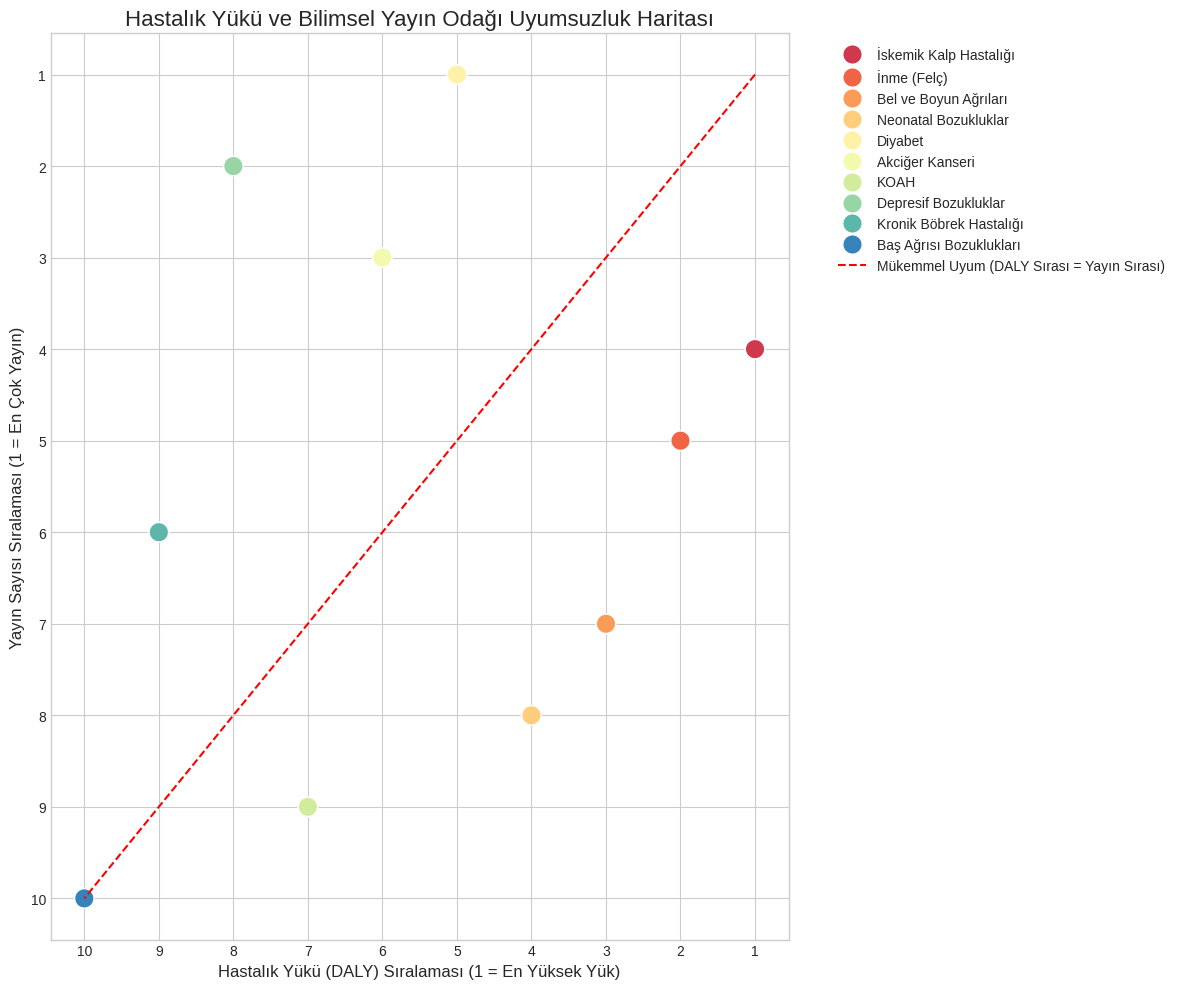


Grafik 2 (Çubuk Grafik) oluşturuluyor...


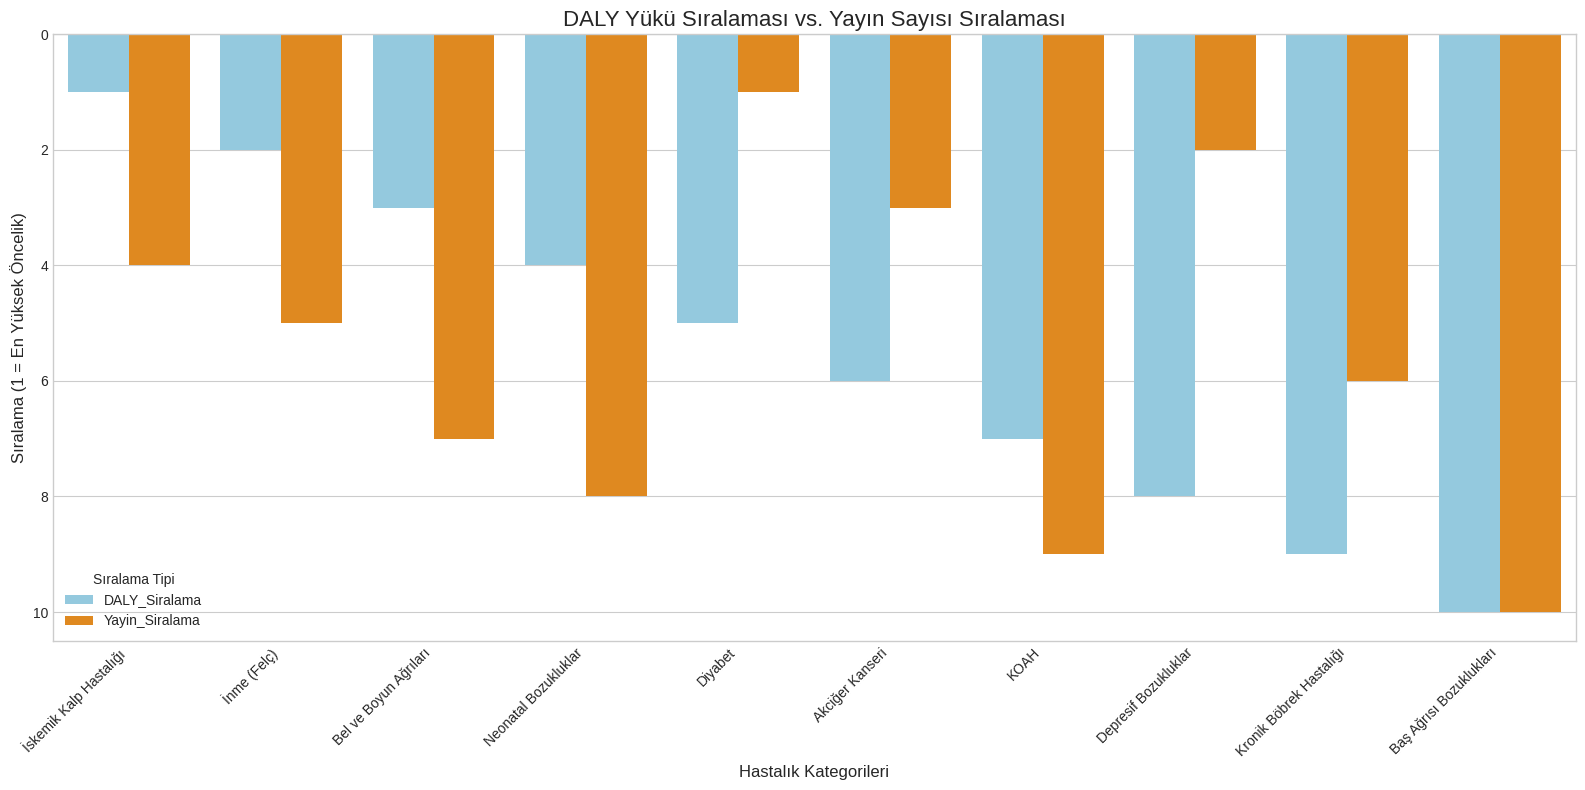

In [13]:
print("Adım 5: Görselleştirme ve Sonuç Raporlaması Başlatılıyor...")

# --- 1. Final Analiz DataFrame'ini Oluşturma ---

try:
    # Adım 4'teki 'final_10_kategoriler' değişkenini (bu bir Series idi) alıyoruz
    yayin_counts_series = final_10_kategoriler['kategori'].value_counts()
except NameError as e:
    # (Eğer bir önceki hücre çalıştırılmadıysa diye yedek plan)
    print("Hata: 'final_10_kategoriler' bulunamadı. Adım 4'ün sonundaki veriler yeniden hesaplanıyor...")
    # 'final_10_kategoriler'i yeniden oluşturalım:
    ANA_KATEGORILER = [
        "İskemik Kalp Hastalığı", "İnme (Felç)", "Akciğer Kanseri", "KOAH",
        "Kronik Böbrek Hastalığı", "Diyabet", "Bel ve Boyun Ağrıları",
        "Depresif Bozukluklar", "Baş Ağrısı Bozuklukları", "Neonatal Bozukluklar"
    ]
    final_10_kategoriler = df_full[df_full['kategori'].isin(ANA_KATEGORILER)]
    yayin_counts_series = final_10_kategoriler['kategori'].value_counts()


# 'Series'i DataFrame'e dönüştür
df_yayin = yayin_counts_series.to_frame(name="Yayin_Sayisi").reset_index()


# 'kategori' (küçük k) sütununun adını 'Kategori' (BÜYÜK K) olarak değiştiriyoruz.
df_yayin = df_yayin.rename(columns={"kategori": "Kategori"})


# Liste A (Hastalık Yükü) - Tablomuza göre manuel giriyoruz
daly_data = {
    "Kategori": [
        "İskemik Kalp Hastalığı", "İnme (Felç)", "Bel ve Boyun Ağrıları",
        "Neonatal Bozukluklar", "Diyabet", "Akciğer Kanseri", "KOAH",
        "Depresif Bozukluklar", "Kronik Böbrek Hastalığı", "Baş Ağrısı Bozuklukları"
    ],
    "DALY_Siralama": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
df_daly = pd.DataFrame(daly_data)

df_final_analiz = pd.merge(df_daly, df_yayin, on="Kategori")

# Yayın Sıralamasını (1'den 10'a) hesaplıyoruz
df_final_analiz = df_final_analiz.sort_values(by="Yayin_Sayisi", ascending=False)
df_final_analiz['Yayin_Siralama'] = range(1, 11)

# Uyumsuzluk sütununu hesaplıyoruz
df_final_analiz['Uyumsuzluk'] = df_final_analiz['DALY_Siralama'] - df_final_analiz['Yayin_Siralama']

# Analiz tablomuzu DALY sıralamasına göre sıralayalım
df_final_analiz = df_final_analiz.sort_values(by="DALY_Siralama").reset_index(drop=True)

print("\n--- Final Analiz Tablosu Hazır ---")
print(df_final_analiz)


# --- 2. Görselleştirme (Seçenek 1: Dağılım Grafiği - En Analitik) ---
print("\nGrafik 1 (Dağılım Grafiği) oluşturuluyor...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

sns.scatterplot(
    data=df_final_analiz,
    x='DALY_Siralama',
    y='Yayin_Siralama',
    hue='Kategori',
    s=200,
    palette='Spectral'
)

plt.plot([1, 10], [1, 10], 'r--', label="Mükemmel Uyum (DALY Sırası = Yayın Sırası)")
plt.xlabel("Hastalık Yükü (DALY) Sıralaması (1 = En Yüksek Yük)", fontsize=12)
plt.ylabel("Yayın Sayısı Sıralaması (1 = En Çok Yayın)", fontsize=12)
plt.title("Hastalık Yükü ve Bilimsel Yayın Odağı Uyumsuzluk Haritası", fontsize=16)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xticks(ticks=range(1, 11))
plt.yticks(ticks=range(1, 11))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#

# --- 3. Görselleştirme  ---
print("\nGrafik 2 (Çubuk Grafik) oluşturuluyor...")

df_melted = df_final_analiz.melt(
    id_vars='Kategori',
    value_vars=['DALY_Siralama', 'Yayin_Siralama'],
    var_name='Sıralama Tipi',
    value_name='Sıralama'
)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_melted,
    x='Kategori',
    y='Sıralama',
    hue='Sıralama Tipi',
    palette={'DALY_Siralama': 'skyblue', 'Yayin_Siralama': 'darkorange'}
)

plt.title("DALY Yükü Sıralaması vs. Yayın Sayısı Sıralaması", fontsize=16)
plt.ylabel("Sıralama (1 = En Yüksek Öncelik)", fontsize=12)
plt.xlabel("Hastalık Kategorileri", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.legend(title="Sıralama Tipi")
plt.tight_layout()
plt.show()

#

## **Sonuç Raporu ve Politika Önerileri**

Bu proje, Türkiye'nin 2020-2025 (17 Kasım) tarihleri arasındaki bilimsel araştırma odağı ile toplumsal hastalık yükü (DALY - Sakatlığa Ayarlanmış Yaşam Yılları) arasındaki uyumu analiz etmek amacıyla gerçekleştirilmiştir. 250.000'den fazla tıbbi makale özetinin (PubMed) incelenmesi için 11 kategorili (10 Hedef + 1 "Diğer") bir Doğal Dil İşleme (NLP) modeli geliştirilmiş ve %89'un üzerinde bir doğrulukla eğitilmiştir.

Analizimiz, araştırma odağı ile toplumsal ihtiyaç arasında belirgin **uyumsuzluklar** olduğunu ortaya koymuştur.

---
### 1. Ana Bulgular: Uyumsuzluk Haritası Ne Anlatıyor?

"Hastalık Yükü (DALY) Sıralaması" ile NLP modelimizin belirlediği "Yayın Sayısı Sıralaması" karşılaştırıldığında üç temel sonuç ortaya çıkmıştır:

* **1. Ciddi İhmal Sinyali (Neglect Signal):**
    Türkiye'nin en ağır sağlık yükünü oluşturan kategoriler, bilimsel yayınlarda *hak ettikleri önceliği* görmemektedir.
    * **İskemik Kalp Hastalığı:** DALY Yükü **1.** sırada iken, Yayın Sıralaması **4.** sıradadır (-3).
    * **İnme (Felç):** DALY Yükü **2.** sırada iken, Yayın Sıralaması **5.** sıradadır (-3).
    * **Bel ve Boyun Ağrıları:** DALY Yükü **3.** sırada iken, Yayın Sıralaması **7.** sıradadır (-4).
    * **Neonatal Bozukluklar:** DALY Yükü **4.** sırada iken, Yayın Sıralaması **8.** sıradadır (-4).

* **2. Yüksek Odak Alanları (High Focus):**
    Bazı kategoriler, DALY yüklerinden *daha yüksek* bir bilimsel ilgi odağı haline gelmiştir. Bu durum, bu alanlardaki farkındalığın veya araştırma fonlarının görece daha güçlü olduğunu göstermektedir.
    * **Depresif Bozukluklar:** DALY Yükü **8.** sırada olmasına rağmen, Yayın Sıralamasında **2.** sıraya yerleşmiştir (+6).
    * **Diyabet:** DALY Yükü **5.** sırada iken, Yayın Sıralamasında **1.** olmuştur (+4).
    * **Akciğer Kanseri:** DALY Yükü **6.** sırada iken, Yayın Sıralamasında **3.** olmuştur (+3).

* **3. Mükemmel Uyum (Perfect Alignment):**
    * **Baş Ağrısı Bozuklukları:** Hem DALY Yükü (10.) hem de Yayın Sıralamasında (10.) son sırada yer alarak mükemmel bir uyum göstermiştir.



---
### 2. Metodolojimizin Kapsamı ve Kısıtları (Limitations)

Bu projenin bulguları, iki önemli metodolojik kapsam dahilinde yorumlanmalıdır:

1.  **Kapsam (Scope):** Bu analiz, "Türkiye'nin en çok yayın yaptığı alan nedir?" sorusunu cevaplamaz. Bu analiz, "Türkiye'nin *DALY Top 10* listesindeki hastalıkların *kendi içindeki* öncelik dağılımı nedir?" sorusunu cevaplar. Modelimizin "Diğer" (217.813 makale) olarak sınıflandırdığı ve COVID-19 gibi devasa konuları içeren alanlar, bu projenin *kapsamı dışında* bırakılmıştır.
2.  **Model Kısıtı:** Modelimiz %89 doğrulukla çalışsa da, `class_weight='balanced'` stratejisi nedeniyle "recall" (duyarlılık) metriğini "precision" (kesinlik) metriğine tercih etmiştir. Bu durum, azınlık sınıflarda (örn. Neonatal Bozukluklar) "Diğer" kategorisinden bazı yanlış pozitiflerin (false positives) gelmiş olabileceği ve sayıları *bir miktar* şişirmiş olabileceği anlamına gelir; ancak bu, genel "ihmal" tablosunu değiştirecek bir etki değildir.

---
### 3. Veriye Dayalı Politika Önerisi

Analizimiz, Türkiye'deki bilimsel araştırma fonlamasının ve akademik teşviklerin, toplumun en ağır sağlık yükleriyle *tam olarak* hizalanmadığını göstermektedir.


**Öneri:** Sağlık Bakanlığı, TÜBİTAK ve ilgili fon sağlayıcı kurumlar; DALY yükü 1., 2., 3. ve 4. sırada olan ancak bilimsel yayınlarda geri plana düşmüş görünen **İskemik Kalp Hastalığı, İnme (Felç), Bel ve Boyun Ağrıları** ve **Neonatal Bozukluklar** gibi kritik alanlarda, özel teşvik programları ve hedefli fonlama çağrıları (targeted funding calls) açarak bu "uyumsuzluk" farkını kapatmalıdır.
